In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("ankieta.csv", sep=";")
print(df.head())


  DZIAL  STAZ CZY_KIER  PYT_1  PYT_2  PYT_3 PLEC  WIEK
0    IT     2      Nie      1     -2      1    M    64
1    IT     2      Nie      0     -2     -2    M    67
2    IT     2      Nie      1      2      2    M    65
3    IT     2      Nie     -1     -2     -2    K    68
4    IT     3      Tak      1      2     -1    K    65


In [17]:
df["STAZ"] = pd.to_numeric(df["STAZ"])
df["WIEK"] = pd.to_numeric(df["WIEK"])
df["PYT_1"] = pd.to_numeric(df["PYT_1"])
df["PYT_2"] = pd.to_numeric(df["PYT_2"])
df["PYT_3"] = pd.to_numeric(df["PYT_3"])

df["DZIAL"] = df["DZIAL"].astype(str)
df["CZY_KIER"] = df["CZY_KIER"].astype(str)
df["PLEC"] = df["PLEC"].astype(str)


In [18]:
print(df.dtypes)

DZIAL       object
STAZ         int64
CZY_KIER    object
PYT_1        int64
PYT_2        int64
PYT_3        int64
PLEC        object
WIEK         int64
dtype: object


In [19]:
print(df.isnull().sum())

DZIAL       0
STAZ        0
CZY_KIER    0
PYT_1       0
PYT_2       0
PYT_3       0
PLEC        0
WIEK        0
dtype: int64


In [20]:
bins = [0, 35, 45, 55, float('inf')]  # Przedziały wiekowe
labels = ['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat']  # Etykiety dla przedziałów
df['WIEK_KAT'] = pd.cut(df['WIEK'], bins=bins, labels=labels, right=True)

In [26]:
tablica_licznosci = {
    "DZIAL": df["DZIAL"].value_counts(),
    "STAZ": df["STAZ"].value_counts(),
    "CZY_KIER": df["CZY_KIER"].value_counts(),
    "PLEC": df["PLEC"].value_counts(),
    "WIEK_KAT": df["WIEK_KAT"].value_counts()
}

# Wyświetlenie tabeli liczności
for zmienna, liczności in tablica_licznosci.items():
    print(f"\nTabela liczności dla {zmienna}:")
    print(liczności)


Tabela liczności dla DZIAL:
DZIAL
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Tabela liczności dla STAZ:
STAZ
2    140
1     41
3     19
Name: count, dtype: int64

Tabela liczności dla CZY_KIER:
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

Tabela liczności dla PLEC:
PLEC
M    129
K     71
Name: count, dtype: int64

Tabela liczności dla WIEK_KAT:
WIEK_KAT
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: count, dtype: int64


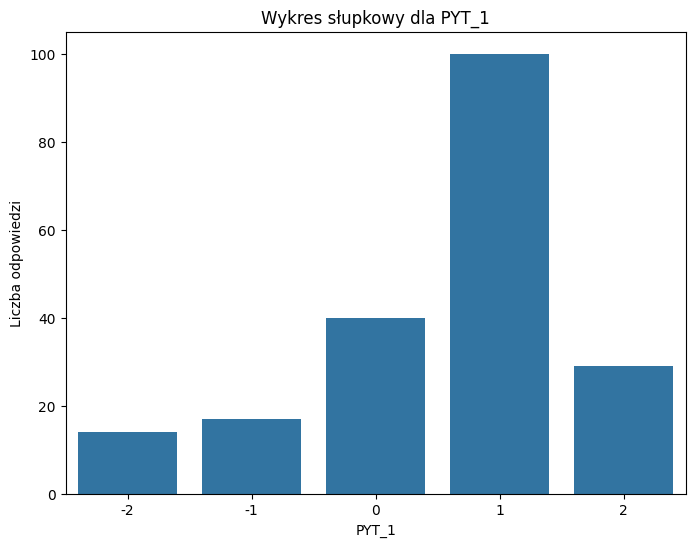

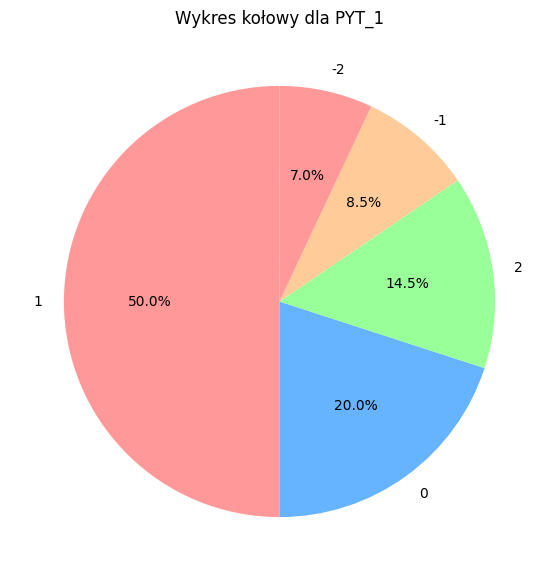

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PYT_1', data=df)
plt.title('Wykres słupkowy dla PYT_1')
plt.xlabel('PYT_1')
plt.ylabel('Liczba odpowiedzi')
plt.show()
# Tworzenie wykresu kołowego dla PYT_1
plt.figure(figsize=(7, 7))
df['PYT_1'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title('Wykres kołowy dla PYT_1')
plt.ylabel('')  # Usunięcie etykiety y
plt.show()

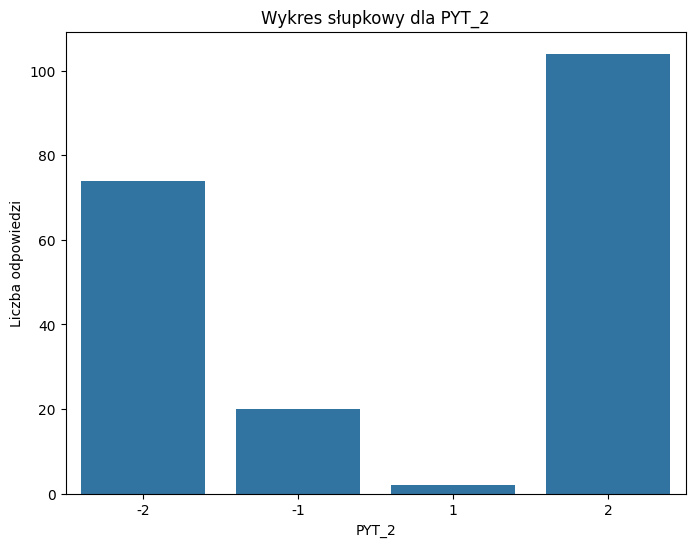

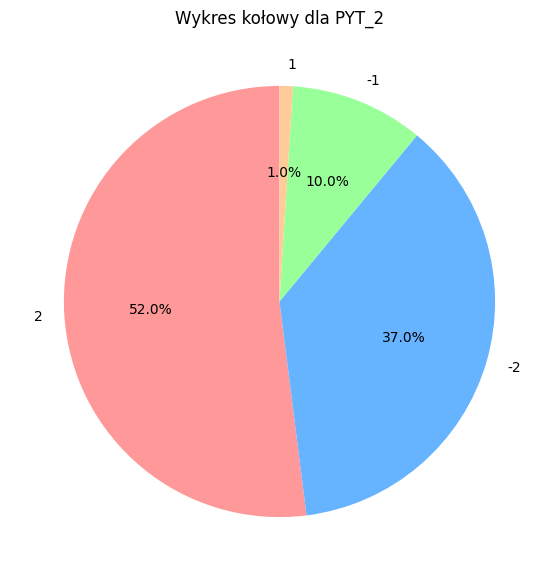

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PYT_2', data=df)
plt.title('Wykres słupkowy dla PYT_2')
plt.xlabel('PYT_2')
plt.ylabel('Liczba odpowiedzi')
plt.show()

plt.figure(figsize=(7, 7))
df['PYT_2'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title('Wykres kołowy dla PYT_2')
plt.ylabel('')  # Usunięcie etykiety y
plt.show()

In [34]:
# Tablica wielodzielcza dla PYT_1 i DZIAŁ
tablica_pyt_1_dzial = pd.crosstab(df['PYT_1'], df['DZIAL'], margins=True, margins_name="Suma")
print("Tablica dla PYT_1 i DZIAŁ:\n", tablica_pyt_1_dzial)

# Tablica wielodzielcza dla PYT_1 i STAZ
tablica_pyt_1_staz = pd.crosstab(df['PYT_1'], df['STAZ'], margins=True, margins_name="Suma")
print("\nTablica dla PYT_1 i STAZ:\n", tablica_pyt_1_staz)

# Tablica wielodzielcza dla PYT_1 i CZY_KIER
tablica_pyt_1_czy_kier = pd.crosstab(df['PYT_1'], df['CZY_KIER'], margins=True, margins_name="Suma")
print("\nTablica dla PYT_1 i CZY_KIER:\n", tablica_pyt_1_czy_kier)

# Tablica wielodzielcza dla PYT_1 i PŁEC
tablica_pyt_1_plec = pd.crosstab(df['PYT_1'], df['PLEC'], margins=True, margins_name="Suma")
print("\nTablica dla PYT_1 i PŁEC:\n", tablica_pyt_1_plec)

# Tablica wielodzielcza dla PYT_1 i WIEK_KAT
tablica_pyt_1_wiek_kat = pd.crosstab(df['PYT_1'], df['WIEK_KAT'], margins=True, margins_name="Suma")
print("\nTablica dla PYT_1 i WIEK_KAT:\n", tablica_pyt_1_wiek_kat)


Tablica dla PYT_1 i DZIAŁ:
 DZIAL  HR  IT  MK  PD  Suma
PYT_1                      
-2      2   0   3   9    14
-1      2   2   3  10    17
0       5   4  14  17    40
1      19  15  15  51   100
2       3   5  10  11    29
Suma   31  26  45  98   200

Tablica dla PYT_1 i STAZ:
 STAZ    1    2   3  Suma
PYT_1                   
-2      5    5   4    14
-1      6   10   1    17
0       8   26   6    40
1      19   75   6   100
2       3   24   2    29
Suma   41  140  19   200

Tablica dla PYT_1 i CZY_KIER:
 CZY_KIER  Nie  Tak  Suma
PYT_1                   
-2         10    4    14
-1         14    3    17
0          34    6    40
1          88   12   100
2          27    2    29
Suma      173   27   200

Tablica dla PYT_1 i PŁEC:
 PLEC    K    M  Suma
PYT_1               
-2      3   11    14
-1      7   10    17
0      14   26    40
1      36   64   100
2      11   18    29
Suma   71  129   200

Tablica dla PYT_1 i WIEK_KAT:
 WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat  S

In [35]:
# Tworzenie tablicy wielodzielczej dla PYT_2 i PYT_3
tablica_pyt_2_pyt_3 = pd.crosstab(df['PYT_2'], df['PYT_3'], margins=True, margins_name="Suma")

# Wyświetlenie tablicy
print("Tablica dla PYT_2 i PYT_3:\n", tablica_pyt_2_pyt_3)


Tablica dla PYT_2 i PYT_3:
 PYT_3  -2  -1   1   2  Suma
PYT_2                      
-2     49  16   5   4    74
-1      3   6  10   1    20
1       0   0   2   0     2
2       0   8  15  81   104
Suma   52  30  32  86   200


In [40]:
df["CZY_ZADOW"] = df["PYT_2"].apply(lambda x: "Zadowolony" if x in [1, 2] 
                                    else ("Niezadowolony" if x in [-2,-1] 
                                          else "Brak odpowiedzi"))

# Sprawdzenie wyników
print(df[["PYT_2", "CZY_ZADOW"]].head())


   PYT_2      CZY_ZADOW
0     -2  Niezadowolony
1     -2  Niezadowolony
2      2     Zadowolony
3     -2  Niezadowolony
4      2     Zadowolony


In [41]:
from statsmodels.graphics.mosaicplot import mosaic

<Figure size 800x600 with 0 Axes>

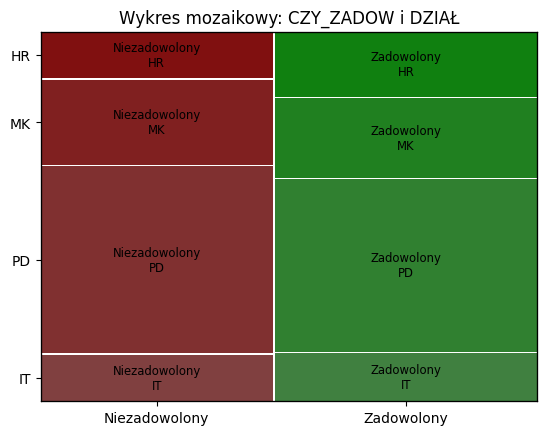

<Figure size 800x600 with 0 Axes>

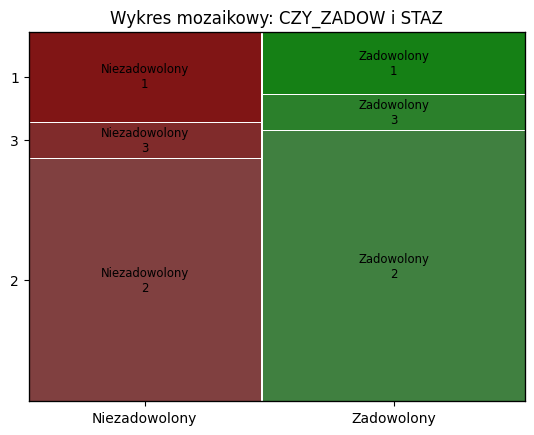

<Figure size 800x600 with 0 Axes>

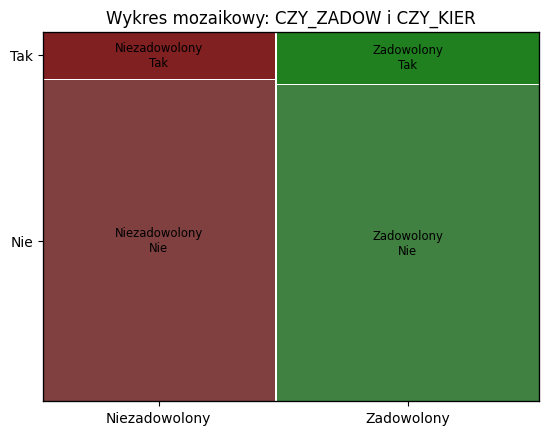

<Figure size 800x600 with 0 Axes>

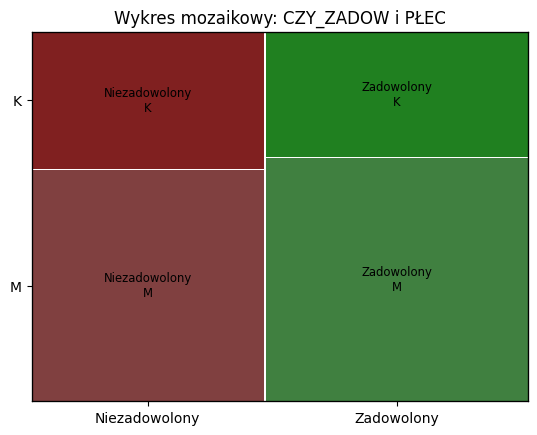

<Figure size 800x600 with 0 Axes>

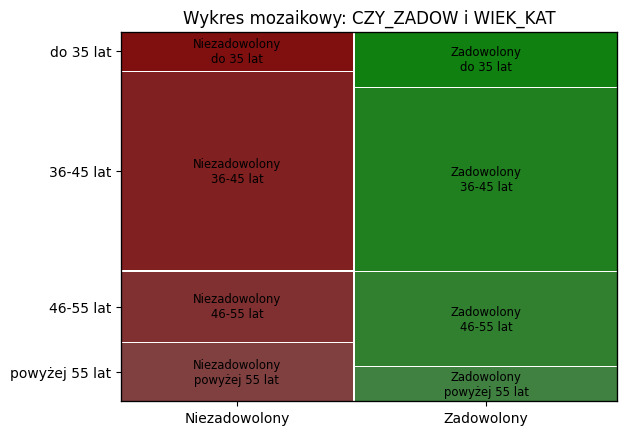

In [43]:
# Wczytanie danych (przy założeniu, że dane są już załadowane)
# df = pd.read_csv('ścieżka_do_pliku.csv', sep=";", encoding="ISO-8859-1")

# Tworzenie wykresów mozaikowych dla poszczególnych par zmiennych

# 1. CZY_ZADOW i DZIAŁ
plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'DZIAL'])
plt.title('Wykres mozaikowy: CZY_ZADOW i DZIAŁ')
plt.show()

# 2. CZY_ZADOW i STAZ
plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'STAZ'])
plt.title('Wykres mozaikowy: CZY_ZADOW i STAZ')
plt.show()

# 3. CZY_ZADOW i CZY_KIER
plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'])
plt.title('Wykres mozaikowy: CZY_ZADOW i CZY_KIER')
plt.show()

# 4. CZY_ZADOW i PŁEC
plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'PLEC'])
plt.title('Wykres mozaikowy: CZY_ZADOW i PŁEC')
plt.show()

# 5. CZY_ZADOW i WIEK_KAT
plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'])
plt.title('Wykres mozaikowy: CZY_ZADOW i WIEK_KAT')
plt.show()
